In [1]:
%pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score, RepeatedStratifiedKFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier
from sklearn.preprocessing import StandardScaler, scale, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.model_selection import LeaveOneOut
from matplotlib import colors
from sklearn.exceptions import UndefinedMetricWarning
from statistics import mean
from tabulate import tabulate
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import statistics
from collections import Counter
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from pygam import LogisticGAM, s
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.discriminant_analysis")
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.model_selection._search")
from imblearn.over_sampling import SMOTE



import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.discriminant_analysis")

In [3]:
data_class_1 = pd.read_csv("Data_Class_1.csv")
data_class_4 = pd.read_csv("Data_Class_3.csv")
data_class_6 = pd.read_csv("Data_Class_4.csv")

#Concatenar os dados de todas as classes num único DataFrame
combined_data = pd.concat([data_class_1, data_class_4, data_class_6])
combined_data

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level,Soil_Type,Wilderness_Area,Vegetation_Type
0,41,2699,347,3,0,0,2096,213,234,159,6853,37.32,282.46,125.22,6.23,Type_20,Area_1,Type_1
1,52,2739,323,25,85,43,3118,149,205,192,6219,76.51,182.57,532.19,30.65,Type_29,Area_1,Type_1
2,53,2696,72,2,30,0,3271,222,234,149,6071,86.37,374.79,275.52,59.96,Type_30,Area_1,Type_1
3,56,2722,315,24,30,19,3216,148,212,200,6132,85.31,364.30,1182.48,22.21,Type_16,Area_1,Type_1
4,68,2919,13,13,90,6,5321,207,214,142,4060,78.13,303.26,1198.69,14.22,Type_29,Area_1,Type_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,12429,2012,155,27,30,3,240,239,230,101,277,46.04,317.49,375.09,6.29,Type_6,Area_4,Type_4
1076,12802,2220,144,32,67,37,1209,245,214,70,1082,33.48,356.58,640.40,48.84,Type_3,Area_4,Type_4
1077,3703,2176,121,29,108,63,1020,254,202,54,382,49.05,283.17,669.14,57.23,Type_3,Area_4,Type_4
1078,4096,2218,138,25,108,60,1448,248,222,86,828,57.92,188.87,783.86,64.88,Type_3,Area_4,Type_4


Descriptive Statistics

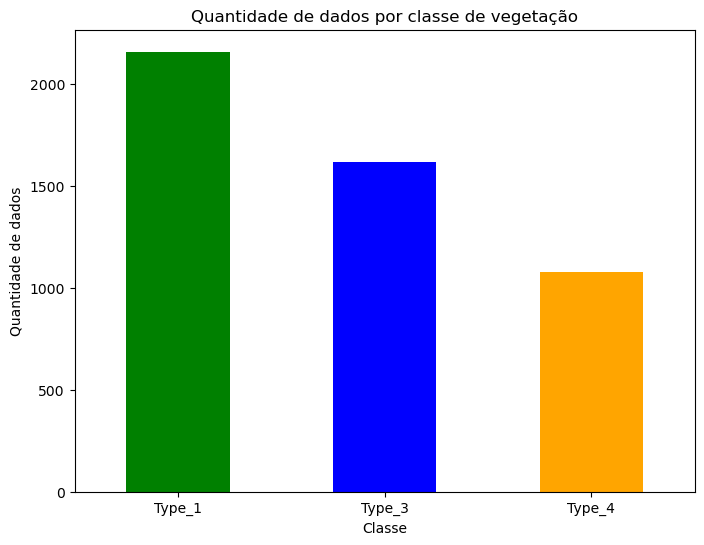

In [4]:
class_counts = combined_data['Vegetation_Type'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['green', 'blue', 'orange'])
plt.title('Quantidade de dados por classe de vegetação')
plt.xlabel('Classe')
plt.ylabel('Quantidade de dados')
plt.xticks(rotation=0)
plt.show()

In [5]:
#Descrição estatística do DataFrame combinado
descriptive_stats = combined_data.describe()

descriptive_stats

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000
mean,7666.403704,2683.500000,158.631687,16.802058,214.393416,48.723045,1672.105967,212.081070,219.67037,135.989918,1380.929835,60.122060,300.047944,648.913975,34.824609
std,4281.430130,433.403686,108.727205,8.866688,191.544909,58.133507,1345.791832,32.478175,22.45307,46.829938,1066.892197,17.278688,86.976939,322.266228,17.434933
min,41.000000,1903.000000,0.000000,1.000000,0.000000,-103.000000,0.000000,58.000000,120.00000,0.000000,0.000000,30.000000,150.070000,90.020000,5.000000
25%,3963.750000,2292.000000,68.000000,10.000000,60.000000,4.000000,726.000000,196.000000,208.00000,106.750000,633.000000,45.130000,223.547500,367.205000,19.620000
50%,7463.500000,2596.500000,129.000000,15.000000,175.000000,30.000000,1231.000000,219.000000,223.00000,138.000000,1110.000000,60.190000,301.085000,648.915000,34.660000
75%,11321.500000,3112.000000,261.000000,23.000000,323.000000,76.000000,2244.000000,236.000000,236.00000,169.000000,1816.000000,75.130000,374.652500,929.935000,50.060000
max,15118.000000,3675.000000,360.000000,47.000000,1129.000000,411.000000,6508.000000,254.000000,254.00000,248.000000,6993.000000,89.960000,449.790000,1199.970000,65.000000


Univariate Analysis (Distribution of individual features)

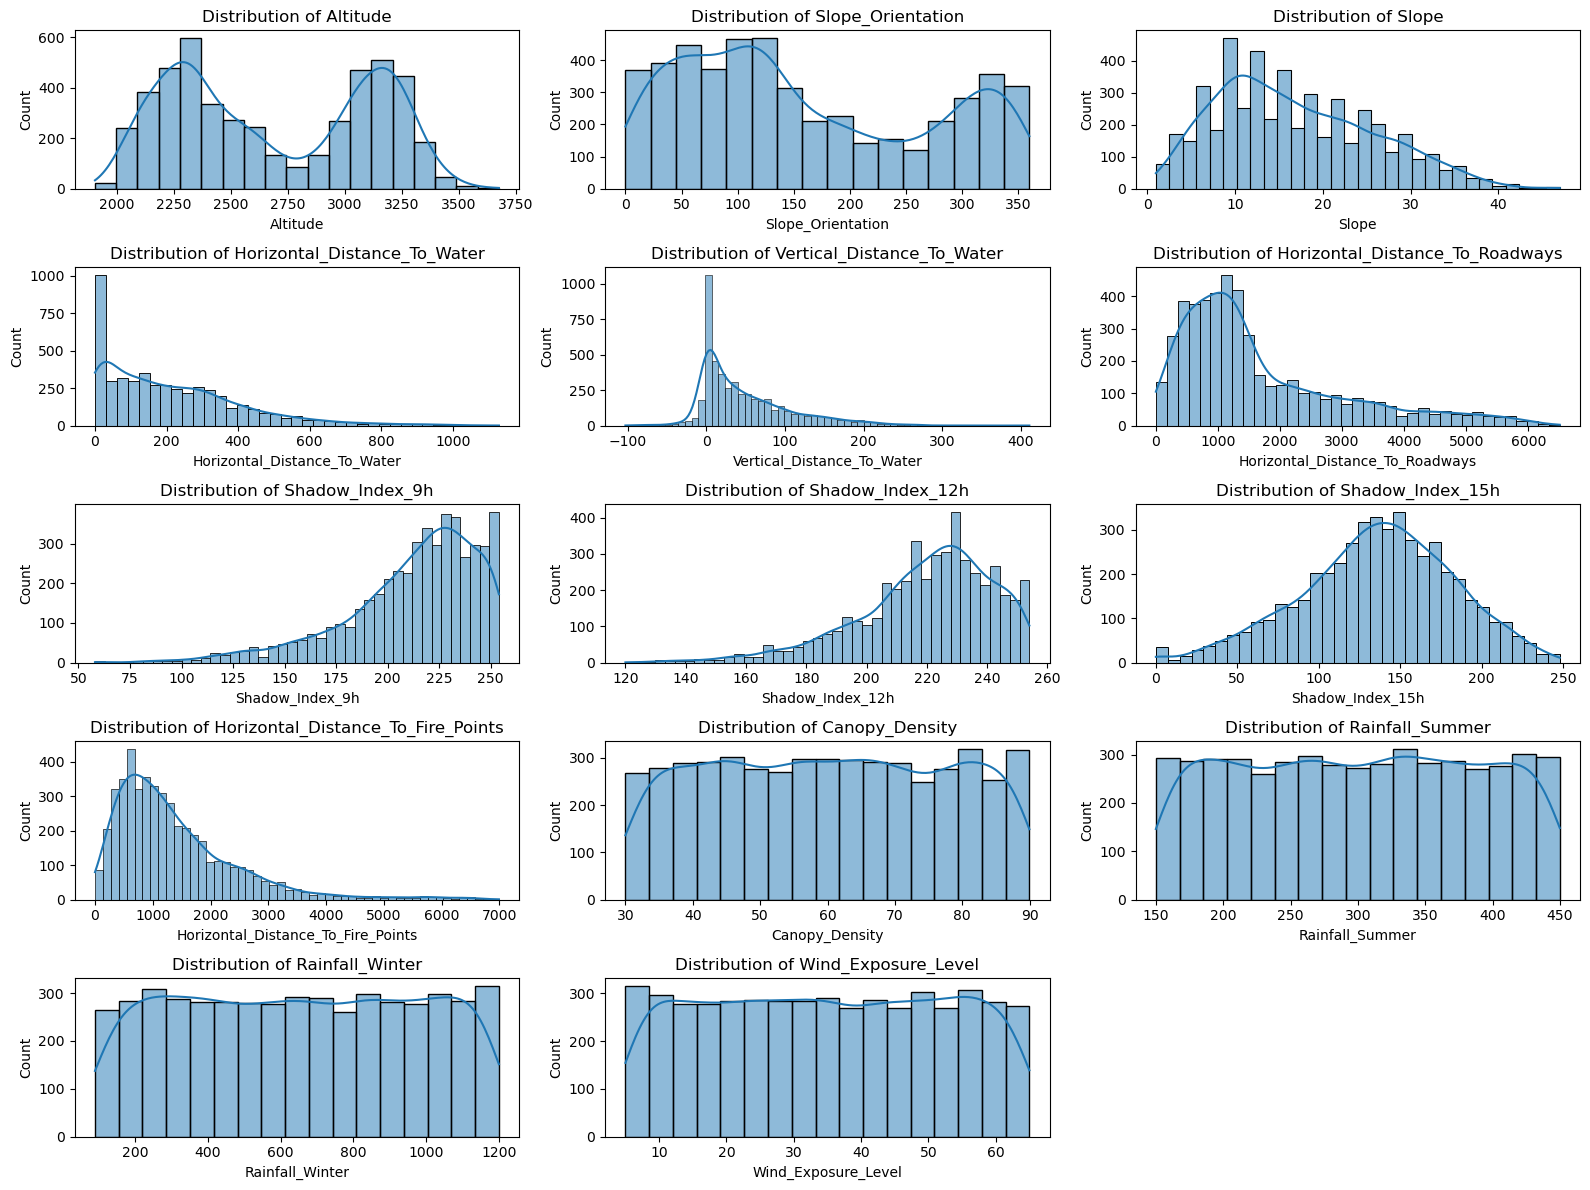

In [6]:
# Lista com os nomes das colunas numéricas para análise
num_cols_complete = ['Altitude', 'Slope_Orientation', 'Slope', 'Horizontal_Distance_To_Water', 
                     'Vertical_Distance_To_Water', 'Horizontal_Distance_To_Roadways',
                     'Shadow_Index_9h', 'Shadow_Index_12h', 'Shadow_Index_15h',
                     'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
                     'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level']

plt.figure(figsize=(16, 12))

#For loop que, através de cada coluna, cria um histograma para cada coluna númerica em análise
for i, col in enumerate(num_cols_complete, 1):
    plt.subplot(5, 3, i)
    sns.histplot(combined_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Bivariate Analysis (Correlation between features and the different target variables)

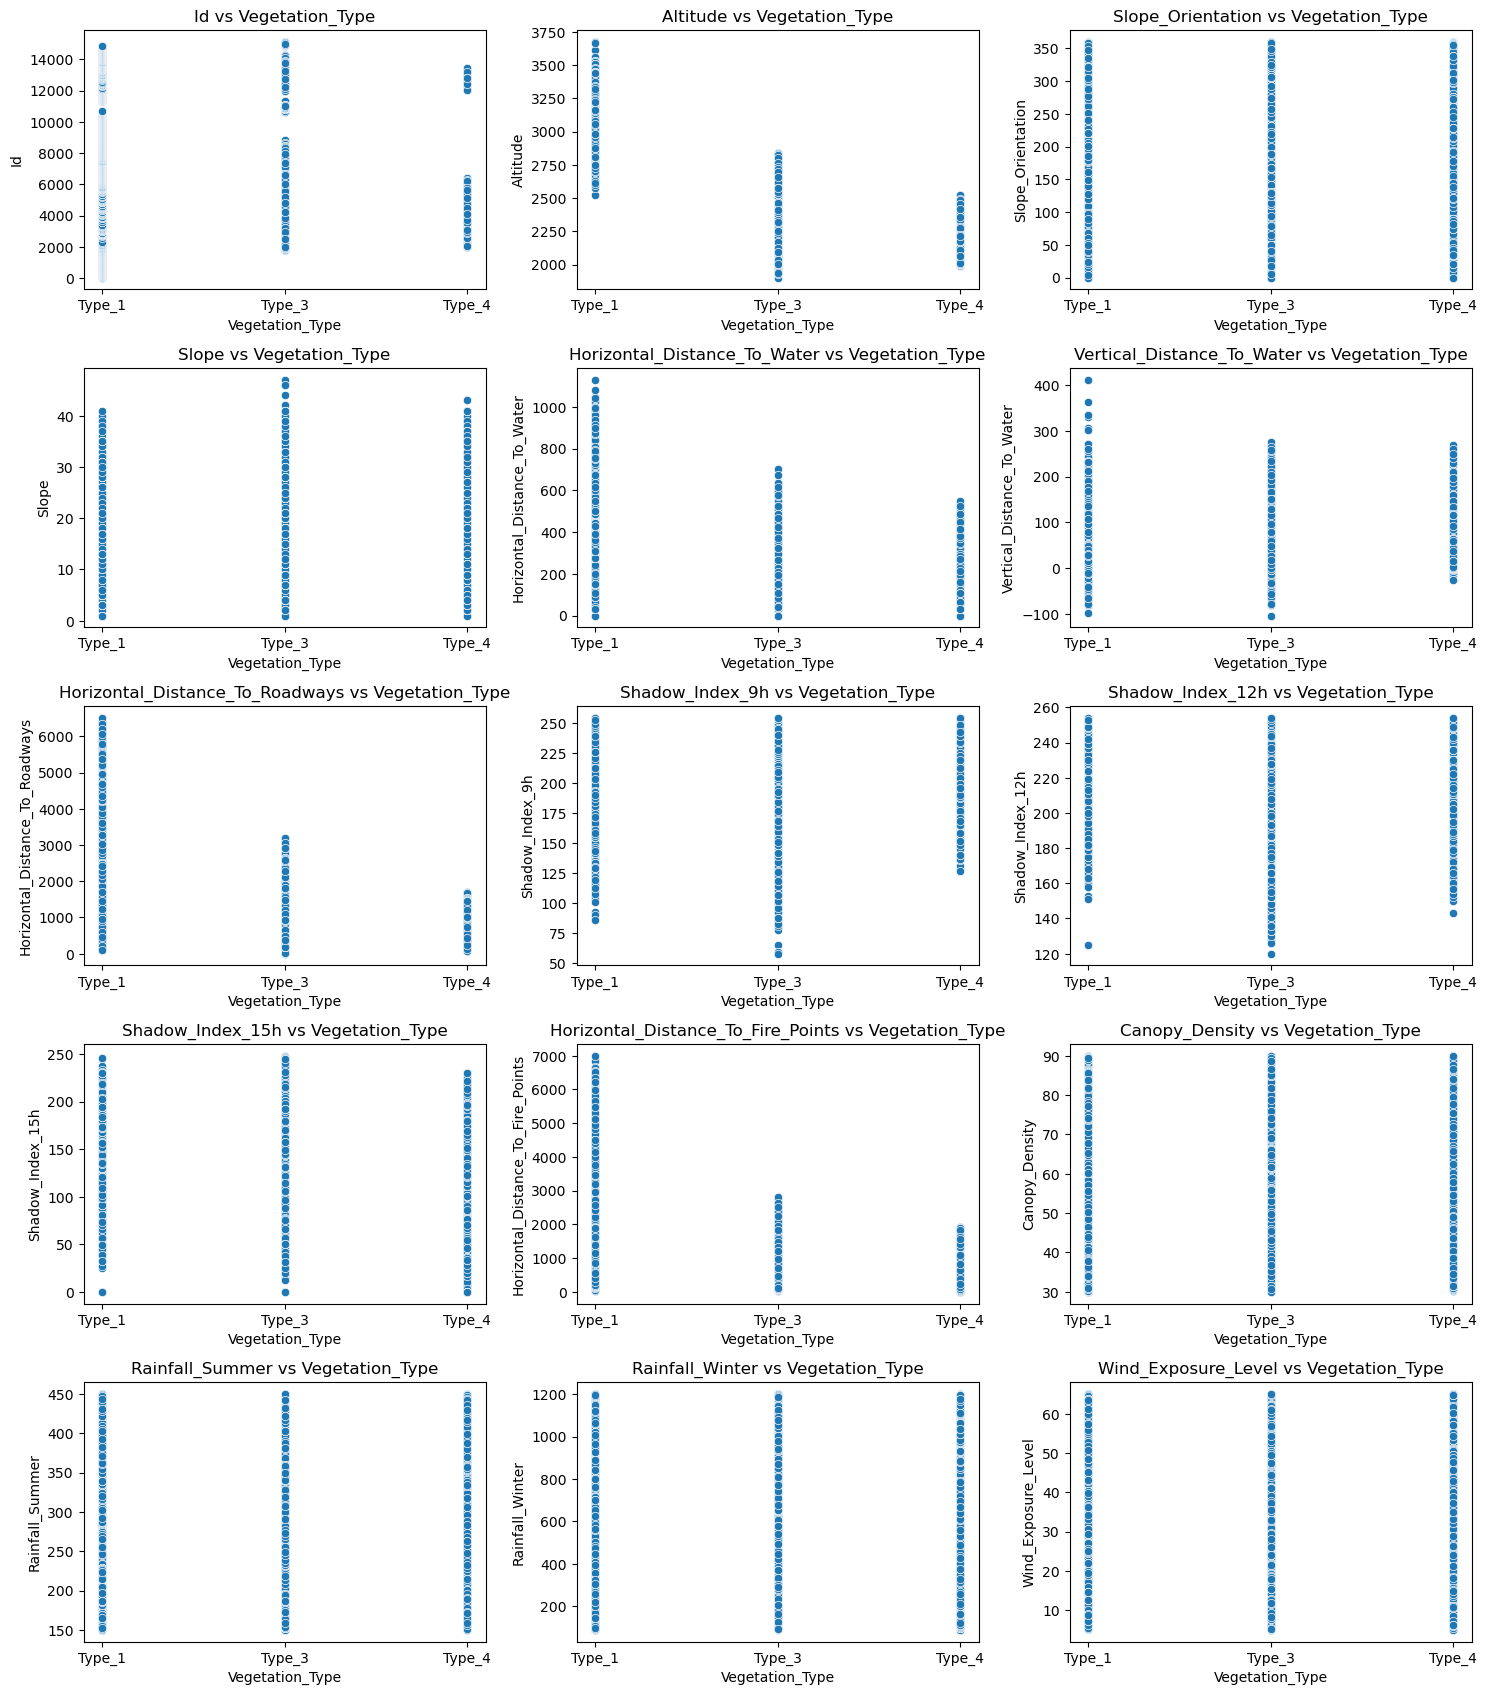

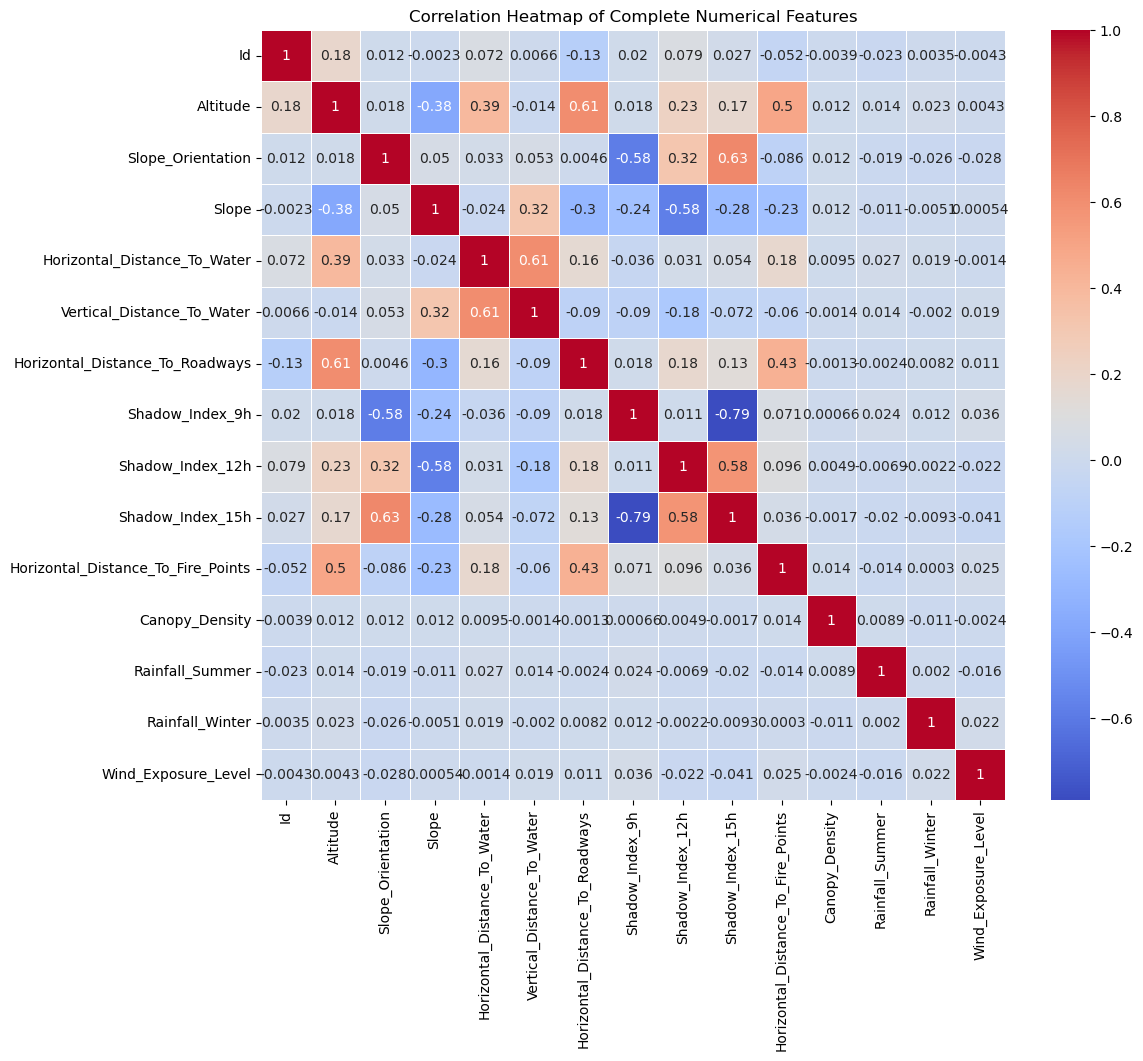

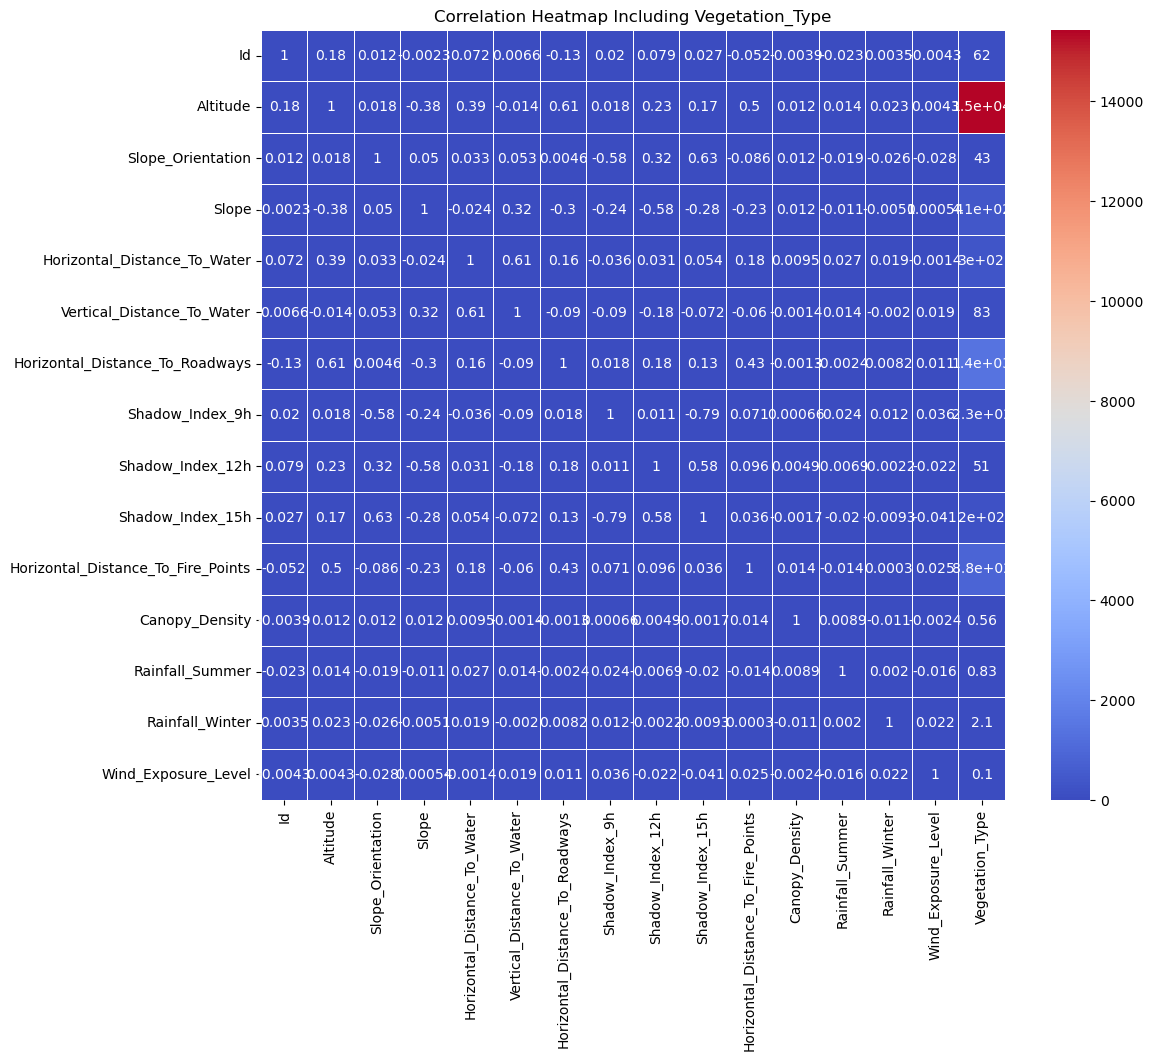

In [7]:
# Seleção das colunas com features numéricas
features = combined_data.select_dtypes(include=['float64', 'int64']).columns

# Gerar scatterplots entre a variável alvo, 'Vegetation_Type', e as features numéricas
plt.figure(figsize=(15, 20))
for i, column in enumerate(features, 1):
    plt.subplot(6, 3, i)
    sns.scatterplot(x='Vegetation_Type', y=column, data=combined_data)
    plt.title(f'{column} vs Vegetation_Type')

plt.tight_layout()
plt.show()

# Matriz de correlação e heatmap para variáveis numéricas
plt.figure(figsize=(12, 10))
corr_matrix_complete = combined_data[features].corr()
sns.heatmap(corr_matrix_complete, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Complete Numerical Features')
plt.show()

# Adicionando 'Vegetation_Type' à matriz de correlação
from sklearn.feature_selection import f_classif

# Computar F-valor para 'Vegetation_Type' e adicionar à matriz de correlação
numerical_features = combined_data.select_dtypes(include=['float64', 'int64']).columns.difference(['Vegetation_Type'])
X = combined_data[numerical_features]
y = combined_data['Vegetation_Type']

# Compute F-statistics for Vegetation_Type and numerical features
f_values, _ = f_classif(X, y)

# Add F-values to the correlation matrix as a new column
corr_matrix_complete['Vegetation_Type'] = pd.Series(f_values, index=numerical_features)

# Heatmap including Vegetation_Type
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_complete, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Including Vegetation_Type')
plt.show()





• Holdout

In [8]:
# X: Dados independentes (sem a coluna correspondente à variável alvo 'Vegetation_Type')
X = combined_data.drop(columns=['Vegetation_Type']) 
# y: Variável alvo ('Vegetation_Type')
y = combined_data['Vegetation_Type']

# Realiza a codificação das variáveis categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Divisão dos dados em conjuntos de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

reports = {}

# Logistic Regression
log_reg_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
# Armazena e imprime o relatório para Logistic Regression
reports['Holdout LR'] = classification_report(y_test, y_pred_log_reg, output_dict=True)
print("\nClassification Report for Holdout Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

# Calcula a média do F1-score 
f1_score_avg_lr_hld = f1_score(y_test, y_pred_log_reg, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
reports['F1-Score Médio - LR - Holdout'] = f1_score_avg_lr_hld
print("F1-Score Médio (Logistic Regression - Holdout - - Type_1, Type_3, Type_4):", f1_score_avg_lr_hld) 

# LDA
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)
# Armazena e imprime o relatório para LDA
reports['Holdout LDA'] = classification_report(y_test, y_pred_lda, output_dict=True)
print("\nClassification Report for Holdout LDA:\n", classification_report(y_test, y_pred_lda))

# Calcula a média do F1-score 
f1_score_avg_lda_hld = f1_score(y_test, y_pred_lda, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
reports['F1-Score Médio - LDA - Holdout'] = f1_score_avg_lda_hld
print("F1-Score Médio (LDA - Holdout - Type_1, Type_3, Type_4):", f1_score_avg_lda_hld) 

# QDA
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
y_pred_qda = qda_model.predict(X_test)
# Armazena e imprime o relatório para QDA
reports['Holdout QDA'] = classification_report(y_test, y_pred_qda, output_dict=True)
print("\nClassification Report for Holdout QDA:\n", classification_report(y_test, y_pred_qda))

# Calcula a média do F1-score 
f1_score_avg_qda_hld = f1_score(y_test, y_pred_qda, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
reports['F1-Score Médio - QDA - Holdout'] = f1_score_avg_qda_hld
print("F1-Score Médio (QDA - Holdout - Type_1, Type_3, Type_4):", f1_score_avg_qda_hld) 


Classification Report for Holdout Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.99      0.99      0.99       638
      Type_3       0.86      0.87      0.87       501
      Type_4       0.81      0.80      0.80       319

    accuracy                           0.91      1458
   macro avg       0.89      0.89      0.89      1458
weighted avg       0.91      0.91      0.91      1458

F1-Score Médio (Logistic Regression - Holdout - - Type_1, Type_3, Type_4): 0.9080077053484418

Classification Report for Holdout LDA:
               precision    recall  f1-score   support

      Type_1       1.00      0.99      1.00       638
      Type_3       0.83      0.82      0.82       501
      Type_4       0.72      0.74      0.73       319

    accuracy                           0.88      1458
   macro avg       0.85      0.85      0.85      1458
weighted avg       0.88      0.88      0.88      1458

F1-Score Médio (LDA - Holdout - Type_1, Type_3

 • Cross Validation (with k = 5 and k = 10)

In [9]:
k_folds_lr_5 = KFold(n_splits=5)
k_folds_lr_10 = KFold(n_splits=10)

# Logistic Regression com validação cruzada (K=5 e K=10)
for n_splits, name in zip([k_folds_lr_5, k_folds_lr_10], ['KFold 5', 'KFold 10']):
    predictions_lr = cross_val_predict(log_reg_model, X_encoded, y, cv=n_splits, n_jobs=-1)
    report_lr = classification_report(y, predictions_lr, output_dict=True)
    reports[f'CV LR {name}'] = report_lr
    print(f"\nClassification Report for {name} Logistic Regression:\n", classification_report(y, predictions_lr))
                                                                                      
    f1_score_avg_lr_kf = f1_score(y, predictions_lr, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
    reports['F1-Score Médio - LR - Cross Validation'] = f1_score_avg_lr_kf
    print("F1-Score Médio (Logistic Regression - Cross Validation - Type_1, Type_3, Type_4):", f1_score_avg_lr_kf)      

# LDA 
for n_splits, name in zip([k_folds_lr_5, k_folds_lr_10], ['KFold 5', 'KFold 10']):
    predictions_lda = cross_val_predict(lda_model, X_encoded, y, cv=n_splits, n_jobs=-1)
    report_lda = classification_report(y, predictions_lda, output_dict=True)
    reports[f'CV LDA {name}'] = report_lda
    print(f"\nClassification Report for {name} LDA:\n", classification_report(y, predictions_lda))
    
    f1_score_avg_lda_kf = f1_score(y, predictions_lda, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
    reports['F1-Score Médio - LDA - Cross Validation'] = f1_score_avg_lda_kf
    print("F1-Score Médio (LDA - Cross Validation - Type_1, Type_3, Type_4):", f1_score_avg_lda_kf)      

# QDA 
for n_splits, name in zip([k_folds_lr_5, k_folds_lr_10], ['KFold 5', 'KFold 10']):
    predictions_qda = cross_val_predict(qda_model, X_encoded, y, cv=n_splits, n_jobs=-1)
    report_qda = classification_report(y, predictions_qda, output_dict=True)
    reports[f'CV QDA {name}'] = report_qda
    print(f"\nClassification Report for {name} QDA:\n", classification_report(y, predictions_qda))
    
    f1_score_avg_qda_kf = f1_score(y, predictions_qda, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
    reports['F1-Score Médio - QDA - Cross Validation'] = f1_score_avg_qda_kf
    print("F1-Score Médio (QDA - Cross Validation - Type_1, Type_3, Type_4):", f1_score_avg_qda_kf)    



Classification Report for KFold 5 Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.98      0.98      0.98      2160
      Type_3       0.55      0.76      0.64      1620
      Type_4       0.23      0.10      0.14      1080

    accuracy                           0.71      4860
   macro avg       0.59      0.61      0.58      4860
weighted avg       0.67      0.71      0.68      4860

F1-Score Médio (Logistic Regression - Cross Validation - Type_1, Type_3, Type_4): 0.6785036631778355

Classification Report for KFold 10 Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.99      0.99      0.99      2160
      Type_3       0.79      0.83      0.81      1620
      Type_4       0.74      0.69      0.71      1080

    accuracy                           0.87      4860
   macro avg       0.84      0.83      0.84      4860
weighted avg       0.87      0.87      0.87      4860

F1-Score Médio (Logist

• Leave One Out Cross Validation (LOOCV)

In [10]:
cv = LeaveOneOut()

# Logistic Regression 
predictions_lr_loocv = cross_val_predict(log_reg_model, X_encoded, y, cv=cv, n_jobs=-1)
report_lr_loocv = classification_report(y, predictions_lr_loocv, output_dict=True)
reports['LOOCV LR'] = report_lr_loocv
print("\nClassification Report for LOOCV Logistic Regression:\n", classification_report(y, predictions_lr_loocv))

f1_score_avg_lr_loocv = f1_score(y, predictions_lr_loocv, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
reports['F1-Score Médio - LR - LOOCV'] = f1_score_avg_lr_loocv
print("F1-Score Médio (Logistic Regression - LOOCV - Type_1, Type_3, Type_4):", f1_score_avg_lr_loocv)    

# LDA 
predictions_lda_loocv = cross_val_predict(lda_model, X_encoded, y, cv=cv, n_jobs=-1)
report_lda_loocv = classification_report(y, predictions_lda_loocv, output_dict=True)
reports['LOOCV LDA'] = report_lda_loocv
print("\nClassification Report for LOOCV LDA:\n", classification_report(y, predictions_lda_loocv))

f1_score_avg_lda_loocv = f1_score(y, predictions_lda_loocv, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
reports['F1-Score Médio - LDA - LOOCV'] = f1_score_avg_lda_loocv
print("F1-Score Médio (LDA - LOOCV - Type_1, Type_3, Type_4):", f1_score_avg_lda_loocv)  

# QDA 
predictions_qda_loocv = cross_val_predict(qda_model, X_encoded, y, cv=cv, n_jobs=-1)
report_qda_loocv = classification_report(y, predictions_qda_loocv, output_dict=True)
reports['LOOCV QDA'] = report_qda_loocv
print("\nClassification Report for LOOCV QDA:\n", classification_report(y, predictions_qda_loocv))

f1_score_avg_qda_loocv = f1_score(y, predictions_qda_loocv, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
reports['F1-Score Médio - QDA - LOOCV'] = f1_score_avg_qda_loocv
print("F1-Score Médio (QDA - LOOCV - Type_1, Type_3, Type_4):", f1_score_avg_qda_loocv) 


Classification Report for LOOCV Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.99      0.99      0.99      2160
      Type_3       0.88      0.87      0.87      1620
      Type_4       0.82      0.83      0.82      1080

    accuracy                           0.92      4860
   macro avg       0.90      0.90      0.90      4860
weighted avg       0.92      0.92      0.92      4860

F1-Score Médio (Logistic Regression - LOOCV - Type_1, Type_3, Type_4): 0.9152720539939918

Classification Report for LOOCV LDA:
               precision    recall  f1-score   support

      Type_1       1.00      0.99      0.99      2160
      Type_3       0.86      0.84      0.85      1620
      Type_4       0.77      0.81      0.79      1080

    accuracy                           0.90      4860
   macro avg       0.88      0.88      0.88      4860
weighted avg       0.90      0.90      0.90      4860

F1-Score Médio (LDA - LOOCV - Type_1, Type_3, Type_4):

• Bootstrap

In [11]:

X_encoded = pd.get_dummies(X, drop_first=True)

#Normalização das features X
scaler = StandardScaler()
X_encoded_scaled = scaler.fit_transform(X_encoded)

#Codificação da variavél target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.inverse_transform(np.unique(y_encoded))

n_iterations = 100

for model, model_name in zip([log_reg_model, lda_model, qda_model], ['LR', 'LDA', 'QDA']):
    bootstrap_estimates = []

#Seleção de amostras random    
    for i in range(n_iterations):
        indices = np.random.choice(len(X_encoded_scaled), size=len(X_encoded_scaled), replace=True)
        #Diferença entre o dataset total e as amostras selecionadas
        out_indices = np.setdiff1d(np.arange(len(X_encoded_scaled)), indices)

        X_bootstrap, y_bootstrap = X_encoded_scaled[indices], y_encoded[indices]
        X_out, y_out = X_encoded_scaled[out_indices], y_encoded[out_indices]

        model.fit(X_bootstrap, y_bootstrap)
        
        if len(out_indices) > 0:
            #Previsão com as amostras não selecionadas anteriormente
            y_pred_out = model.predict(X_out)
            accuracy = accuracy_score(y_out, y_pred_out)
            bootstrap_estimates.append(accuracy)
            
            #Cálculo do F1-Score médio
            f1_score_iter = f1_score(y_out, y_pred_out, labels=label_encoder.transform(['Type_1', 'Type_3', 'Type_4']), average='weighted', zero_division=1)

    mean_accuracy = np.mean(bootstrap_estimates)
    print(f"\nMean out accuracy for {model_name} over {n_iterations} bootstrap samples: {mean_accuracy:.4f}")

    # Relatório de classificação final
    final_report = classification_report(y_out, y_pred_out, target_names=class_names)
    print(f"\nClassification Report for {model_name}:\n{final_report}")

    reports[f'Bootstrap {model_name}'] = final_report
    reports[f'F1-Score Médio - {model_name} - Bootstrap '] = f1_score_iter
    print(f"F1-Score for {model_name}: {f1_score_iter:.4f}")


reports.update(reports)


Mean out accuracy for LR over 100 bootstrap samples: 0.9135

Classification Report for LR:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      0.99       785
      Type_3       0.86      0.88      0.87       598
      Type_4       0.83      0.80      0.82       414

    accuracy                           0.91      1797
   macro avg       0.90      0.89      0.89      1797
weighted avg       0.91      0.91      0.91      1797

F1-Score for LR: 0.9120

Mean out accuracy for LDA over 100 bootstrap samples: 0.9027

Classification Report for LDA:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      0.99       824
      Type_3       0.83      0.86      0.84       605
      Type_4       0.79      0.76      0.78       408

    accuracy                           0.89      1837
   macro avg       0.87      0.87      0.87      1837
weighted avg       0.90      0.89      0.89      1837

F1-Score for LDA: 0.8949

Me

**Ridge**

In [12]:
# Ridge - Holdout - LR
reports_ridge = {}

# Aplicação do método Ridge ao método Regressão Logistica no Holdout
ridge_log_reg_model_hld = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0, penalty='l2')
ridge_log_reg_model_hld.fit(X_train, y_train)

y_pred_ridge_log_reg = ridge_log_reg_model_hld.predict(X_test)

# Exibição do relatório da classificação
report_ridge_hld = classification_report(y_test, y_pred_ridge_log_reg, output_dict=True)

# Cálculo de F1-Score médio
f1_score_avg_hld_ridge = f1_score(y_test, y_pred_ridge_log_reg, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
reports_ridge['F1-Score Ridge LR Holdout'] = f1_score_avg_hld_ridge
reports['Holdout LR - Ridge'] = report_ridge_hld

print("F1-Score Médio (Logistic Regression - Holdout - Type_1, Type_3, Type_4):", f1_score_avg_hld_ridge) 
print("\nClassification Report for Logistic Regression with Ridge Regularization:\n", classification_report(y_test, y_pred_ridge_log_reg))

# Apresentação dos coeficientes 
coef_df = pd.DataFrame(ridge_log_reg_model_hld.coef_, columns=X_train.columns)
coef_df.index = [f'Coefficients for Class {i}' for i in range(1, ridge_log_reg_model_hld.coef_.shape[0] + 1)]

# Adicionando coeficientes ao relatório
reports_ridge['Coefficients Holdout'] = coef_df.to_dict()
print("\nCoefficients of Ridge Logistic Regression:\n", coef_df)

F1-Score Médio (Logistic Regression - Holdout - Type_1, Type_3, Type_4): 0.9080077053484418

Classification Report for Logistic Regression with Ridge Regularization:
               precision    recall  f1-score   support

      Type_1       0.99      0.99      0.99       638
      Type_3       0.86      0.87      0.87       501
      Type_4       0.81      0.80      0.80       319

    accuracy                           0.91      1458
   macro avg       0.89      0.89      0.89      1458
weighted avg       0.91      0.91      0.91      1458


Coefficients of Ridge Logistic Regression:
                                 Id  Altitude  Slope_Orientation     Slope  \
Coefficients for Class 1 -0.000147  0.026348          -0.002273 -0.332133   
Coefficients for Class 2  0.000050 -0.004714          -0.000749  0.093278   
Coefficients for Class 3 -0.000014 -0.012047           0.000654  0.048534   

                          Horizontal_Distance_To_Water  \
Coefficients for Class 1                

In [13]:
# Ridge - CV k=5 e k=10
if 'reports_ridge' not in globals():
    reports_ridge = {}

# Aplicação do método Ridge ao método Regressão Logistica no Cross Validation
ridge_log_reg_model_kf = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0, penalty='l2')

# Realização do treino para o dataset total 
ridge_log_reg_model_kf.fit(X_encoded, y)

k_folds_ridge_5 = KFold(n_splits=5)
k_folds_ridge_10 = KFold(n_splits=10)

for n_splits, name in zip([k_folds_ridge_5, k_folds_ridge_10], ['KFold 5', 'KFold 10']):
    # Realização da previsão
    predictions_ridge = cross_val_predict(ridge_log_reg_model_kf, X_encoded, y, cv=n_splits, n_jobs=-1)
    
    # Exibição do relatório da classificação
    report_ridge_cv = classification_report(y, predictions_ridge, output_dict=True)
    reports_ridge[f'CV Ridge LR {name}'] = report_ridge_cv
    
    print(f"\nClassification Report for {name} Ridge Logistic Regression:\n", classification_report(y, predictions_ridge))
    
    # Cálculo de F1-Score médio
    f1_score_avg_cv_ridge = f1_score(y, predictions_ridge, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
    reports_ridge[f'F1-Score Ridge LR CV {name}'] = f1_score_avg_cv_ridge
    print("F1-Score Médio (Logistic Regression - Cross Validation - Type_1, Type_3, Type_4):", f1_score_avg_cv_ridge) 

# Apresentação dos coeficientes
coef_df = pd.DataFrame(ridge_log_reg_model_kf.coef_, columns=X_encoded.columns)
coef_df.index = [f'Coefficients for Class {i}' for i in range(1, ridge_log_reg_model_kf.coef_.shape[0] + 1)]

# Adicionando coeficientes ao relatório
reports_ridge['Coefficients CV'] = coef_df.to_dict()

print("\nCoefficients of Ridge Logistic Regression after CV:\n", coef_df)




Classification Report for KFold 5 Ridge Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.98      0.98      0.98      2160
      Type_3       0.55      0.76      0.64      1620
      Type_4       0.23      0.10      0.14      1080

    accuracy                           0.71      4860
   macro avg       0.59      0.61      0.58      4860
weighted avg       0.67      0.71      0.68      4860

F1-Score Médio (Logistic Regression - Cross Validation - Type_1, Type_3, Type_4): 0.6785036631778355

Classification Report for KFold 10 Ridge Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.99      0.99      0.99      2160
      Type_3       0.79      0.83      0.81      1620
      Type_4       0.74      0.69      0.71      1080

    accuracy                           0.87      4860
   macro avg       0.84      0.83      0.84      4860
weighted avg       0.87      0.87      0.87      4860

F1-Score M

In [14]:
# Ridge - LOOCV - LR
if 'reports_ridge' not in globals():
    reports_ridge = {}

# Aplicação do método Ridge ao método Regressão Logistica no Leave One Out Cross Validation
ridge_log_reg_model_loocv = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0, penalty='l2')

# Realização do treino para o dataset total
ridge_log_reg_model_loocv.fit(X_encoded, y)

# Realização da previsão
predictions_ridge_loocv = cross_val_predict(ridge_log_reg_model_loocv, X_encoded, y, cv=cv, n_jobs=-1)

# Exibição do relatório da classificação
report_ridge_loocv = classification_report(y, predictions_ridge_loocv, output_dict=True)
reports_ridge['CV Ridge LR LOOCV'] = report_ridge_loocv

print("\nClassification Report for LOOCV Ridge Logistic Regression:\n", classification_report(y, predictions_ridge_loocv))

# Cálculo de F1-Score médio
f1_score_avg_loocv_ridge = f1_score(y, predictions_ridge_loocv, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
reports_ridge['F1-Score Ridge LR LOOCV'] = f1_score_avg_loocv_ridge
print("F1-Score Médio (Logistic Regression - LOOCV - Type_1, Type_3, Type_4):", f1_score_avg_loocv_ridge)

# Apresentação dos coeficientes
coef_df_loocv = pd.DataFrame(ridge_log_reg_model_loocv.coef_, columns=X_encoded.columns)
coef_df_loocv.index = [f'Coefficients for Class {i}' for i in range(1, ridge_log_reg_model_loocv.coef_.shape[0] + 1)]

# Adicionando coeficientes ao relatório
reports_ridge['Coefficients LOOCV'] = coef_df_loocv.to_dict()

print("\nCoefficients of Ridge Logistic Regression after LOOCV:\n", coef_df_loocv)


Classification Report for LOOCV Ridge Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.99      0.99      0.99      2160
      Type_3       0.88      0.87      0.87      1620
      Type_4       0.82      0.83      0.82      1080

    accuracy                           0.92      4860
   macro avg       0.90      0.90      0.90      4860
weighted avg       0.92      0.92      0.92      4860

F1-Score Médio (Logistic Regression - LOOCV - Type_1, Type_3, Type_4): 0.9152720539939918

Coefficients of Ridge Logistic Regression after LOOCV:
                                 Id  Altitude  Slope_Orientation     Slope  \
Coefficients for Class 1 -0.000138  0.028343          -0.004994 -0.376580   
Coefficients for Class 2  0.000050 -0.004813          -0.000022  0.099861   
Coefficients for Class 3 -0.000009 -0.010640          -0.000268  0.027399   

                          Horizontal_Distance_To_Water  \
Coefficients for Class 1                    

In [15]:
# Initialize reports_ridge once at the start of the script
if 'reports_ridge' not in globals():
    reports_ridge = {}

# Ridge - Bootstrap - LR
n_iterations = 100

# Aplicação do método Ridge ao método Regressão Logistica no Bootstrap
ridge_log_reg_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0, penalty='l2')

for model, model_name in zip([ridge_log_reg_model], ['Ridge LR']):
    bootstrap_estimates = []

    # Seleção de amostras random        
    for i in range(n_iterations):
        indices = np.random.choice(len(X_encoded_scaled), size=len(X_encoded_scaled), replace=True)
        out_indices = np.setdiff1d(np.arange(len(X_encoded_scaled)), indices)

        X_bootstrap, y_bootstrap = X_encoded_scaled[indices], y_encoded[indices]
        X_out, y_out = X_encoded_scaled[out_indices], y_encoded[out_indices]

        model.fit(X_bootstrap, y_bootstrap)

        if len(out_indices) > 0:
            y_pred_out = model.predict(X_out)
            accuracy = accuracy_score(y_out, y_pred_out)
            bootstrap_estimates.append(accuracy)
            
            f1_score_iter = f1_score(
                y_out, y_pred_out, labels=label_encoder.transform(['Type_1', 'Type_3', 'Type_4']), average='weighted', zero_division=1
            )

    mean_accuracy = np.mean(bootstrap_estimates)
    print(f"\nMean out accuracy for {model_name} over {n_iterations} bootstrap samples: {mean_accuracy:.4f}")

    # Final classification report
    final_report = classification_report(y_out, y_pred_out, target_names=class_names, output_dict=True)
    reports_ridge[f'Bootstrap {model_name}'] = final_report
    print(f"\nClassification Report for {model_name}:\n{classification_report(y_out, y_pred_out, target_names=class_names)}")

    # Add F1-Score to the report
    reports_ridge[f'F1-Score Médio - {model_name} - Bootstrap - Ridge'] = f1_score_iter
    print(f"F1-Score for {model_name} - Ridge: {f1_score_iter:.4f}")

# Realização do treino para o dataset total 
ridge_log_reg_model.fit(X_encoded_scaled, y_encoded)

# Apresentação dos coeficientes
coef_df_ridge = pd.DataFrame(ridge_log_reg_model.coef_, columns=X_encoded.columns)
coef_df_ridge.index = [f'Coefficients for Class {i}' for i in range(1, ridge_log_reg_model.coef_.shape[0] + 1)]

# Adicionando coeficientes ao relatório
reports_ridge['Coefficients Bootstrap'] = coef_df_ridge.to_dict()

print("\nCoefficients of Ridge Bootstrap Logistic Regression:\n", coef_df_ridge)



Mean out accuracy for Ridge LR over 100 bootstrap samples: 0.9121

Classification Report for Ridge LR:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      0.99       764
      Type_3       0.87      0.86      0.86       595
      Type_4       0.81      0.83      0.82       415

    accuracy                           0.91      1774
   macro avg       0.89      0.89      0.89      1774
weighted avg       0.91      0.91      0.91      1774

F1-Score for Ridge LR - Ridge: 0.9100

Coefficients of Ridge Bootstrap Logistic Regression:
                                 Id  Altitude  Slope_Orientation     Slope  \
Coefficients for Class 1 -0.085453  1.648524          -0.098630 -0.356995   
Coefficients for Class 2  0.085626 -0.302392           0.074426  0.297862   
Coefficients for Class 3  0.006639 -1.060491          -0.101599 -0.159184   

                          Horizontal_Distance_To_Water  \
Coefficients for Class 1                      0.289678 

**LASSO**

In [16]:
# Initialize reports_lasso once at the start of the script
if 'reports_lasso' not in globals():
    reports_lasso = {}

# LASSO - Holdout LR
# Aplicação do método Lasso ao método Regressão Logistica no Holdout
lasso_log_reg_model_hld = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0, penalty='l1', max_iter=200)

lasso_log_reg_model_hld.fit(X_train, y_train)

y_pred_lasso_log_reg = lasso_log_reg_model_hld.predict(X_test)

# Apresentação do relatório de classificação
report_lasso_hld = classification_report(y_test, y_pred_lasso_log_reg, output_dict=True)
reports_lasso['Classification Report Holdout - LASSO'] = report_lasso_hld

# Cálculo de F1-Score médio
f1_score_avg_hld_lasso = f1_score(y_test, y_pred_lasso_log_reg, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
reports_lasso['F1-Score Médio Holdout - LASSO'] = f1_score_avg_hld_lasso

print("F1-Score Médio (Logistic Regression - Holdout - LASSO - Type_1, Type_3, Type_4):", f1_score_avg_hld_lasso)
print("\nClassification Report for Logistic Regression with LASSO Regularization:\n", classification_report(y_test, y_pred_lasso_log_reg, zero_division=0))

# Apresentação dos coeficientes
coef_hld_lasso = pd.DataFrame(lasso_log_reg_model_hld.coef_, columns=X_train.columns)
coef_hld_lasso.index = [f'Coefficients for Class {i}' for i in range(1, lasso_log_reg_model_hld.coef_.shape[0] + 1)]

# Adicionando coeficientes ao relatório
reports_lasso['Coefficients Holdout - LASSO'] = coef_hld_lasso.to_dict()

print("\nCoefficients of LASSO Logistic Regression:\n", coef_hld_lasso)


F1-Score Médio (Logistic Regression - Holdout - LASSO - Type_1, Type_3, Type_4): 0.9020099504136359

Classification Report for Logistic Regression with LASSO Regularization:
               precision    recall  f1-score   support

      Type_1       0.99      0.99      0.99       638
      Type_3       0.86      0.86      0.86       501
      Type_4       0.79      0.80      0.79       319

    accuracy                           0.90      1458
   macro avg       0.88      0.88      0.88      1458
weighted avg       0.90      0.90      0.90      1458


Coefficients of LASSO Logistic Regression:
                                 Id  Altitude  Slope_Orientation     Slope  \
Coefficients for Class 1 -0.000147  0.023236          -0.001564 -0.289139   
Coefficients for Class 2  0.000045 -0.004464          -0.000915  0.080679   
Coefficients for Class 3  0.000018 -0.009035           0.000666  0.000290   

                          Horizontal_Distance_To_Water  \
Coefficients for Class 1        

In [17]:
# Initialize reports_lasso once at the start of the script
if 'reports_lasso' not in globals():
    reports_lasso = {}

# LASSO - CV k=5 e k=10
# Aplicação do método Lasso ao método Regressão Logistica no Cross Validation
lasso_log_reg_model_kf = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0, penalty='l1')

# Realização do treino para o dataset total
lasso_log_reg_model_kf.fit(X_encoded, y)

k_folds_lasso_5 = KFold(n_splits=5)
k_folds_lasso_10 = KFold(n_splits=10)

for n_splits, name in zip([k_folds_lasso_5, k_folds_lasso_10], ['KFold 5', 'KFold 10']):
    
    # Realização da previsão
    predictions_lasso = cross_val_predict(lasso_log_reg_model_kf, X_encoded, y, cv=n_splits, n_jobs=-1)

    # Apresentação do relatório de classificação
    report_lasso = classification_report(y, predictions_lasso, output_dict=True)
    reports_lasso[f'Classification Report LASSO {name}'] = report_lasso
    
    print(f"\nClassification Report for {name} LASSO Logistic Regression:\n", classification_report(y, predictions_lasso))
    
    # Cálculo de F1-score médio
    f1_score_avg_cv_lasso = f1_score(y, predictions_lasso, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
    reports_lasso[f'F1-Score Médio LASSO LR {name}'] = f1_score_avg_cv_lasso
    print("F1-Score Médio (Logistic Regression - Cross Validation - LASSO - Type_1, Type_3, Type_4):", f1_score_avg_cv_lasso)

# Apresentação dos coeficientes
coef_cv_lasso = pd.DataFrame(lasso_log_reg_model_kf.coef_, columns=X_encoded.columns)
coef_cv_lasso.index = [f'Coefficients for Class {i}' for i in range(1, lasso_log_reg_model_kf.coef_.shape[0] + 1)]

# Adicionando coeficientes ao relatório
reports_lasso['Coefficients after CV - LASSO'] = coef_cv_lasso.to_dict()

print("\nCoefficients of LASSO Logistic Regression after CV:\n", coef_cv_lasso)



Classification Report for KFold 5 LASSO Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.98      0.98      0.98      2160
      Type_3       0.54      0.74      0.63      1620
      Type_4       0.22      0.10      0.13      1080

    accuracy                           0.71      4860
   macro avg       0.58      0.61      0.58      4860
weighted avg       0.67      0.71      0.68      4860

F1-Score Médio (Logistic Regression - Cross Validation - LASSO - Type_1, Type_3, Type_4): 0.6755770200283389

Classification Report for KFold 10 LASSO Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.99      0.99      0.99      2160
      Type_3       0.80      0.81      0.81      1620
      Type_4       0.74      0.72      0.73      1080

    accuracy                           0.87      4860
   macro avg       0.84      0.84      0.84      4860
weighted avg       0.87      0.87      0.87      4860

F1

In [18]:
# Initialize reports_lasso once at the start of the script
if 'reports_lasso' not in globals():
    reports_lasso = {}

# LASSO - LOOCV - LR
# Aplicação do método Lasso ao método Regressão Logistica no Leave One Out Cross Validation
lasso_log_reg_model_loocv = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0, penalty='l1')

# Realização do treino para o dataset total 
lasso_log_reg_model_loocv.fit(X_encoded, y)

# Realização da previsão
predictions_lasso_loocv = cross_val_predict(lasso_log_reg_model_loocv, X_encoded, y, cv=cv, n_jobs=-1)

# Apresentação do relatório de classificação
report_lasso_loocv = classification_report(y, predictions_lasso_loocv, output_dict=True)
reports_lasso['Classification Report LASSO LOOCV'] = report_lasso_loocv

print("\nClassification Report for LOOCV LASSO Logistic Regression:\n", classification_report(y, predictions_lasso_loocv))

# Cálculo de F1-score médio
f1_score_avg_loocv_lasso = f1_score(y, predictions_lasso_loocv, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
reports_lasso['F1-Score Médio LASSO LR LOOCV'] = f1_score_avg_loocv_lasso

print("F1-Score Médio (Logistic Regression - LOOCV - LASSO - Type_1, Type_3, Type_4):", f1_score_avg_loocv_lasso)

# Apresentação dos coeficientes
coef_loocv_lasso = pd.DataFrame(lasso_log_reg_model_loocv.coef_, columns=X_encoded.columns)
coef_loocv_lasso.index = [f'Coeficientes para Classe {i}' for i in range(1, lasso_log_reg_model_loocv.coef_.shape[0] + 1)]

# Adicionando coeficientes ao relatório
reports_lasso['Coefficients LOOCV - LASSO'] = coef_loocv_lasso.to_dict()

print("\nCoefficients of LASSO Logistic Regression after LOOCV:\n", coef_loocv_lasso)



Classification Report for LOOCV LASSO Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.99      0.99      0.99      2160
      Type_3       0.88      0.87      0.87      1620
      Type_4       0.82      0.83      0.82      1080

    accuracy                           0.92      4860
   macro avg       0.90      0.90      0.90      4860
weighted avg       0.92      0.92      0.92      4860

F1-Score Médio (Logistic Regression - LOOCV - LASSO - Type_1, Type_3, Type_4): 0.9159159029859302

Coefficients of LASSO Logistic Regression after LOOCV:
                                   Id  Altitude  Slope_Orientation     Slope  \
Coeficientes para Classe 1 -0.000136  0.024498          -0.003248 -0.331988   
Coeficientes para Classe 2  0.000043 -0.004311          -0.000211  0.089065   
Coeficientes para Classe 3  0.000013 -0.007991          -0.000769 -0.008732   

                            Horizontal_Distance_To_Water  \
Coeficientes para Classe 1

In [19]:
# Initialize reports_lasso once at the start of the script
if 'reports_lasso' not in globals():
    reports_lasso = {}

# LASSO - Bootstrap - LR
n_iterations = 100

# Aplicação do método Lasso ao método Regressão Logistica no Bootstrap
lasso_log_reg_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0, penalty='l1')

for model, model_name in zip([lasso_log_reg_model], ['LASSO LR']):
    bootstrap_estimates = []

    # Seleção de amostras random        
    for i in range(n_iterations):
        indices = np.random.choice(len(X_encoded_scaled), size=len(X_encoded_scaled), replace=True)
        
        # Diferença entre o dataset total e as amostras selecionadas
        out_indices = np.setdiff1d(np.arange(len(X_encoded_scaled)), indices)

        X_bootstrap, y_bootstrap = X_encoded_scaled[indices], y_encoded[indices]
        X_out, y_out = X_encoded_scaled[out_indices], y_encoded[out_indices]

        model.fit(X_bootstrap, y_bootstrap)

        if len(out_indices) > 0:
            # Previsão com as amostras não selecionadas anteriormente
            y_pred_out = model.predict(X_out)
            accuracy = accuracy_score(y_out, y_pred_out)
            bootstrap_estimates.append(accuracy)
            
            # Cálculo de F1-score médio
            f1_score_iter = f1_score(
                y_out, y_pred_out, labels=label_encoder.transform(['Type_1', 'Type_3', 'Type_4']), average='weighted', zero_division=1
            )

    mean_accuracy = np.mean(bootstrap_estimates)
    print(f"\nMean out accuracy for {model_name} over {n_iterations} bootstrap samples: {mean_accuracy:.4f}")

    # Final classification report
    final_report = classification_report(y_out, y_pred_out, target_names=class_names, output_dict=True)
    reports_lasso[f'Bootstrap {model_name}'] = final_report
    print(f"\nClassification Report for {model_name}:\n{classification_report(y_out, y_pred_out, target_names=class_names)}")

    # Add F1-Score to the report
    reports_lasso[f'F1-Score Médio - {model_name} - Bootstrap - LASSO'] = f1_score_iter
    print(f"F1-Score for {model_name} - LASSO: {f1_score_iter:.4f}")

# Realização do treino para o dataset total 
lasso_log_reg_model.fit(X_encoded_scaled, y_encoded)

# Apresentação dos coeficientes
coef_df_lasso = pd.DataFrame(lasso_log_reg_model.coef_, columns=X_encoded.columns)
coef_df_lasso.index = [f'Coefficients for Class {i}' for i in range(1, lasso_log_reg_model.coef_.shape[0] + 1)]

# Adicionando coeficientes ao relatório
reports_lasso['Coefficients Bootstrap - LASSO'] = coef_df_lasso.to_dict()

print("\nCoefficients of LASSO Logistic Regression:\n", coef_df_lasso)



Mean out accuracy for LASSO LR over 100 bootstrap samples: 0.9134

Classification Report for LASSO LR:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      0.99       791
      Type_3       0.86      0.88      0.87       590
      Type_4       0.83      0.80      0.82       400

    accuracy                           0.91      1781
   macro avg       0.89      0.89      0.89      1781
weighted avg       0.91      0.91      0.91      1781

F1-Score for LASSO LR - LASSO: 0.9124

Coefficients of LASSO Logistic Regression:
                                Id  Altitude  Slope_Orientation     Slope  \
Coefficients for Class 1  0.00000  5.795526            0.00000  0.000000   
Coefficients for Class 2  0.02022 -0.552227            0.00000  0.296335   
Coefficients for Class 3  0.00000 -1.052838           -0.00176 -0.075977   

                          Horizontal_Distance_To_Water  \
Coefficients for Class 1                      0.000000   
Coefficient

**Elastic Net**

In [20]:
# Initialize reports_elasticnet once at the start of the script
if 'reports_elasticnet' not in globals():
    reports_elasticnet = {}

# Elastic Net - Holdout - LR
# Aplicação do método Elastic Net ao método Regressão Logistica no Holdout
elastic_net_log_reg_model_hld = LogisticRegression(
    solver='saga', C=0.05, multi_class='ovr', random_state=0, penalty='elasticnet', l1_ratio=0.5, max_iter=9000
)

# Treino
elastic_net_log_reg_model_hld.fit(X_train, y_train)

# Previsão
y_pred_elastic_net_log_reg = elastic_net_log_reg_model_hld.predict(X_test)

# Apresentação do relatório de classificação
report_elastic_net = classification_report(y_test, y_pred_elastic_net_log_reg, output_dict=True)
reports_elasticnet['Classification Report Holdout - Elastic Net'] = report_elastic_net

print("\nClassification Report for Logistic Regression with Elastic Net Regularization:\n", classification_report(y_test, y_pred_elastic_net_log_reg, zero_division=0))

# Cálculo de F1-score médio
f1_score_avg_hld_elastic_net = f1_score(y_test, y_pred_elastic_net_log_reg, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
reports_elasticnet['F1-Score Médio Holdout - Elastic Net'] = f1_score_avg_hld_elastic_net

print("F1-Score Médio (Logistic Regression - Holdout - Type_1, Type_3, Type_4):", f1_score_avg_hld_elastic_net)

# Apresentação dos coeficientes
coef_hld_elastic = pd.DataFrame(elastic_net_log_reg_model_hld.coef_, columns=X_train.columns)
coef_hld_elastic.index = [f'Coefficients for Class {i}' for i in range(1, elastic_net_log_reg_model_hld.coef_.shape[0] + 1)]

# Adicionando coeficientes ao relatório
reports_elasticnet['Coefficients Holdout - Elastic Net'] = coef_hld_elastic.to_dict()

print("\nCoefficients of Elastic Net Logistic Regression:\n", coef_hld_elastic)


Classification Report for Logistic Regression with Elastic Net Regularization:
               precision    recall  f1-score   support

      Type_1       0.95      0.99      0.97       638
      Type_3       0.82      0.77      0.79       501
      Type_4       0.74      0.76      0.75       319

    accuracy                           0.86      1458
   macro avg       0.84      0.84      0.84      1458
weighted avg       0.86      0.86      0.86      1458

F1-Score Médio (Logistic Regression - Holdout - Type_1, Type_3, Type_4): 0.8593654515662237

Coefficients of Elastic Net Logistic Regression:
                                 Id  Altitude  Slope_Orientation     Slope  \
Coefficients for Class 1 -0.000134  0.012895          -0.001439 -0.049079   
Coefficients for Class 2  0.000122 -0.002773          -0.002050  0.049096   
Coefficients for Class 3 -0.000040 -0.008870           0.001027  0.004577   

                          Horizontal_Distance_To_Water  \
Coefficients for Class 1    

In [21]:
# Initialize reports_elasticnet once at the start of the script
if 'reports_elasticnet' not in globals():
    reports_elasticnet = {}

# ElasticNet - CV - LR
# Aplicação do método Elastic Net ao método Regressão Logistica no Cross Validation
elastic_net_log_reg_model_kf = LogisticRegression(
    solver='saga', C=0.05, multi_class='ovr', random_state=0, penalty='elasticnet', l1_ratio=0.5, max_iter=9000
)

# Realização do treino para o dataset total
elastic_net_log_reg_model_kf.fit(X_encoded, y)

k_folds_elastic_net_5 = KFold(n_splits=5)
k_folds_elastic_net_10 = KFold(n_splits=10)

for n_splits, name in zip([k_folds_elastic_net_5, k_folds_elastic_net_10], ['KFold 5', 'KFold 10']):
    # Previsão
    predictions_elastic_net = cross_val_predict(elastic_net_log_reg_model_kf, X_encoded, y, cv=n_splits, n_jobs=-1)
    
    # Apresentação do relatório de classificação
    report_elastic_net = classification_report(y, predictions_elastic_net, output_dict=True)
    reports_elasticnet[f'Classification Report CV Elastic Net {name}'] = report_elastic_net
    
    print(f"\nClassification Report for {name} Elastic Net Logistic Regression:\n", classification_report(y, predictions_elastic_net))
    
    # Cálculo de F1-score médio
    f1_score_avg_cv_elastic_net = f1_score(y, predictions_elastic_net, labels=['Type_1', 'Type_3', 'Type_4'], average='weighted')
    reports_elasticnet[f'F1-Score Médio Elastic Net LR {name}'] = f1_score_avg_cv_elastic_net
    
    print(f"F1-Score Médio (Logistic Regression - Cross Validation - Elastic Net - {name}): {f1_score_avg_cv_elastic_net}")

# Apresentação dos coeficientes
coef_cv_elastic = pd.DataFrame(elastic_net_log_reg_model_kf.coef_, columns=X_encoded.columns)
coef_cv_elastic.index = [f'Coeficientes para Classe {i}' for i in range(1, elastic_net_log_reg_model_kf.coef_.shape[0] + 1)]

# Adicionando coeficientes ao relatório
reports_elasticnet['Coefficients after CV - Elastic Net'] = coef_cv_elastic.to_dict()

print("\nCoefficients of Elastic Net Logistic Regression after CV:\n", coef_cv_elastic)


Classification Report for KFold 5 Elastic Net Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.93      0.97      0.95      2160
      Type_3       0.49      0.60      0.54      1620
      Type_4       0.16      0.09      0.12      1080

    accuracy                           0.65      4860
   macro avg       0.53      0.55      0.54      4860
weighted avg       0.61      0.65      0.63      4860

F1-Score Médio (Logistic Regression - Cross Validation - Elastic Net - KFold 5): 0.6279208555975503

Classification Report for KFold 10 Elastic Net Logistic Regression:
               precision    recall  f1-score   support

      Type_1       0.95      0.98      0.97      2160
      Type_3       0.67      0.72      0.69      1620
      Type_4       0.61      0.51      0.55      1080

    accuracy                           0.79      4860
   macro avg       0.74      0.74      0.74      4860
weighted avg       0.78      0.79      0.78      4860


In [22]:
# Initialize reports_elasticnet once at the start of the script
if 'reports_elasticnet' not in globals():
    reports_elasticnet = {}

# ElasticNet - Bootstrap - LR
n_iterations = 100

# Aplicação do método Elastic Net ao método Regressão Logistica no Bootstrap
elastic_net_log_reg_bs = LogisticRegression(
    solver='saga', C=0.05, multi_class='ovr', random_state=0, penalty='elasticnet', l1_ratio=0.5, max_iter=9000
)

for model, model_name in zip([elastic_net_log_reg_bs], ['Elastic Net LR']):
    bootstrap_estimates_elastic_net = []

    # Seleção de amostras random            
    for i in range(n_iterations):
        indices = np.random.choice(len(X_encoded_scaled), size=len(X_encoded_scaled), replace=True)
        
        # Diferença entre o dataset total e as amostras selecionadas
        out_indices = np.setdiff1d(np.arange(len(X_encoded_scaled)), indices)

        X_bootstrap, y_bootstrap = X_encoded_scaled[indices], y_encoded[indices]
        X_out, y_out = X_encoded_scaled[out_indices], y_encoded[out_indices]

        model.fit(X_bootstrap, y_bootstrap)

        if len(out_indices) > 0:
            # Previsão com as amostras não selecionadas anteriormente
            y_pred_out = model.predict(X_out)
            accuracy = accuracy_score(y_out, y_pred_out)
            bootstrap_estimates_elastic_net.append(accuracy)

            # Cálculo de F1-score
            f1_score_iter = f1_score(
                y_out, y_pred_out, labels=label_encoder.transform(['Type_1', 'Type_3', 'Type_4']), average='weighted', zero_division=1
            )

    mean_accuracy = np.mean(bootstrap_estimates_elastic_net)
    print(f"\nMean out accuracy for {model_name} over {n_iterations} bootstrap samples: {mean_accuracy:.4f}")

    # Final classification report
    final_report = classification_report(y_out, y_pred_out, target_names=class_names, output_dict=True)
    reports_elasticnet[f'Bootstrap Classification Report {model_name}'] = final_report
    
    print(f"\nClassification Report for {model_name}:\n{classification_report(y_out, y_pred_out, target_names=class_names)}")

    # Add F1-Score to the report
    reports_elasticnet[f'F1-Score Médio - {model_name} - Bootstrap'] = f1_score_iter
    print(f"F1-Score for {model_name}: {f1_score_iter:.4f}")

# Realização do treino para o dataset total 
elastic_net_log_reg_bs.fit(X_encoded_scaled, y_encoded)

# Apresentação dos coeficientes
coef_df_elastic = pd.DataFrame(elastic_net_log_reg_bs.coef_, columns=X_encoded.columns)
coef_df_elastic.index = [f'Coeficientes para Classe {i}' for i in range(1, elastic_net_log_reg_bs.coef_.shape[0] + 1)]

# Adicionando coeficientes ao relatório
reports_elasticnet['Coefficients Bootstrap - Elastic Net'] = coef_df_elastic.to_dict()

print("\nCoefficients of Elastic Net Logistic Regression:\n", coef_df_elastic)


Mean out accuracy for Elastic Net LR over 100 bootstrap samples: 0.9134

Classification Report for Elastic Net LR:
              precision    recall  f1-score   support

      Type_1       1.00      0.99      0.99       820
      Type_3       0.86      0.88      0.87       584
      Type_4       0.82      0.80      0.81       377

    accuracy                           0.91      1781
   macro avg       0.89      0.89      0.89      1781
weighted avg       0.91      0.91      0.91      1781

F1-Score for Elastic Net LR: 0.9131

Coefficients of Elastic Net Logistic Regression:
                                   Id  Altitude  Slope_Orientation     Slope  \
Coeficientes para Classe 1  0.000000  2.610756           0.000000 -0.186789   
Coeficientes para Classe 2  0.066058 -0.315529           0.043045  0.278897   
Coeficientes para Classe 3  0.000000 -1.405261          -0.079621 -0.099137   

                            Horizontal_Distance_To_Water  \
Coeficientes para Classe 1             

# **PARTE 2 DO PROJETO**

Esta é a **Parte 2** do projeto, onde exploramos metodologias avançadas para análise, seleção de features e comparação de modelos, com o objetivo de identificar os melhores preditores e melhorar o desempenho dos nossos classificadores.

Nesta etapa, aplicamos técnicas de regularização como **Lasso**, **Ridge**, e **Elastic Net**, avaliamos a relevância das features e determinamos aquelas que têm maior impacto nos resultados finais. Também utilizamos métricas como o **F1-Score** para validar e comparar os diferentes métodos.

Ao longo desta seção, destacamos:
- **Análise detalhada das features relevantes.**
- **Comparação de modelos com diferentes regularizações.**
- **Identificação das melhores combinações de preditores para maximizar a precisão.**

In [23]:
# Exibir os relatórios do Lasso
print("Reports - Lasso:\n")
for key, value in reports_lasso.items():
    print(f"{key}: {value}\n")

# Exibir os relatórios do Ridge
print("Reports - Ridge:\n")
for key, value in reports_ridge.items():
    print(f"{key}: {value}\n")

# Exibir os relatórios do Elastic Net
print("Reports - Elastic Net:\n")
for key, value in reports_elasticnet.items():
    print(f"{key}: {value}\n")


Reports - Lasso:

Classification Report Holdout - LASSO: {'Type_1': {'precision': 0.9921507064364207, 'recall': 0.9905956112852664, 'f1-score': 0.9913725490196078, 'support': 638.0}, 'Type_3': {'precision': 0.858, 'recall': 0.8562874251497006, 'f1-score': 0.8571428571428571, 'support': 501.0}, 'Type_4': {'precision': 0.7912772585669782, 'recall': 0.7962382445141066, 'f1-score': 0.79375, 'support': 319.0}, 'accuracy': 0.901920438957476, 'macro avg': {'precision': 0.8804759883344663, 'recall': 0.8810404269830245, 'f1-score': 0.8807551353874882, 'support': 1458.0}, 'weighted avg': {'precision': 0.902103975438479, 'recall': 0.901920438957476, 'f1-score': 0.9020099504136359, 'support': 1458.0}}

F1-Score Médio Holdout - LASSO: 0.9020099504136359

Coefficients Holdout - LASSO: {'Id': {'Coefficients for Class 1': -0.00014725672603100646, 'Coefficients for Class 2': 4.473932028784936e-05, 'Coefficients for Class 3': 1.771752789951477e-05}, 'Altitude': {'Coefficients for Class 1': 0.02323595138

In [24]:
# Example: Coefficients from Lasso, Ridge, and Elastic Net (replace with actual data)
features = ["Altitude", "Slope", "Shadow_Index_9h", "Horizontal_Distance_To_Water"]
lasso_coefficients = [0.023, -0.289, -0.272, 0.0]
ridge_coefficients = [0.026, -0.332, -0.332, -0.002]
elastic_net_coefficients = [0.013, -0.049, -0.075, 0.002]

# Create DataFrame
coefficients_df = pd.DataFrame({
    "Feature": features,
    "Lasso": lasso_coefficients,
    "Ridge": ridge_coefficients,
    "Elastic Net": elastic_net_coefficients
}).set_index("Feature")

# Identify relevant features (non-zero for Lasso)
relevant_lasso = coefficients_df[coefficients_df["Lasso"] != 0]
print("Relevant Features from Lasso:\n", relevant_lasso)

# Rank features by absolute coefficient values (Ridge and Elastic Net)
coefficients_df["Ridge_Abs"] = coefficients_df["Ridge"].abs()
coefficients_df["Elastic_Net_Abs"] = coefficients_df["Elastic Net"].abs()

ridge_top_features = coefficients_df.sort_values(by="Ridge_Abs", ascending=False)
elastic_net_top_features = coefficients_df.sort_values(by="Elastic_Net_Abs", ascending=False)

print("Top Features by Ridge:\n", ridge_top_features)
print("Top Features by Elastic Net:\n", elastic_net_top_features)


Relevant Features from Lasso:
                  Lasso  Ridge  Elastic Net
Feature                                   
Altitude         0.023  0.026        0.013
Slope           -0.289 -0.332       -0.049
Shadow_Index_9h -0.272 -0.332       -0.075
Top Features by Ridge:
                               Lasso  Ridge  Elastic Net  Ridge_Abs  \
Feature                                                              
Slope                        -0.289 -0.332       -0.049      0.332   
Shadow_Index_9h              -0.272 -0.332       -0.075      0.332   
Altitude                      0.023  0.026        0.013      0.026   
Horizontal_Distance_To_Water  0.000 -0.002        0.002      0.002   

                              Elastic_Net_Abs  
Feature                                        
Slope                                   0.049  
Shadow_Index_9h                         0.075  
Altitude                                0.013  
Horizontal_Distance_To_Water            0.002  
Top Features by Elast

In [1]:
#Class 1 vs (Classe 3 + Classe 4)
#Selected features based on LASSO, Ridge, and Elastic Net
allSelectedFeatures = [
  "Altitude",
  "Slope",
  "Aspect",
  "Hillshade_9h",
  "Hillshade_12h",
  "Hillshade_15h",
  "Shadow_Index_9h",
  "Shadow_Index_12h",
  "Horizontal_Distance_To_Roadways",
  "Vertical_Distance_To_Water",
  "Wilderness_Area_Area_1",
  "Wilderness_Area_Area_2",
  "Wilderness_Area_Area_3",
  "Wilderness_Area_Area_4",
  "Soil_Type_Type_1",
  "Soil_Type_Type_3",
  "Soil_Type_Type_7",
  "Soil_Type_Type_10",
  "Soil_Type_Type_11",
  "Soil_Type_Type_17",
  "Precipitation_Spring",
  "Precipitation_Summer",
  "Precipitation_Fall",
  "Precipitation_Winter",
  "Temperature_Daily_Avg",
  "Canopy_Density",
  "Wind_Exposure",
  "Solar_Radiation",
  "Annual_Snowfall",
  "Growing_Degree_Days"
]

categorical_features = []
continuous_features = []

for feature in allSelectedFeatures:
    unique_values = X_encoded[feature].nunique()
    if unique_values <= 10:  # Threshold for categorical features
        categorical_features.append(feature)
    else:
        continuous_features.append(feature)

print("Categorical Features:", categorical_features)
print("Continuous Features:", continuous_features)



# Filter features
X_selected = X_encoded[allSelectedFeatures]

# Get indices of selected features in X_encoded
selected_indices = [X_encoded.columns.get_loc(col) for col in allSelectedFeatures]

# Use only the selected features from the normalized dataset
X_scaled_selected = X_encoded_scaled[:, selected_indices]

# Verify shape
print("Shape de X_scaled_selected:", X_scaled_selected.shape)

# Create binary labels for the task (Class 1 vs. Class 4 + Class 6)
y_model_1 = (y_encoded == label_encoder.transform(['Type_1'])[0]).astype(int)

# Configuração inicial do modelo
base_gam = LogisticGAM(
    s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) +
    s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + 
    s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) +
    s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) +
    s(29) + s(30) + s(31) + s(32) + s(33) + s(34) + s(35) +
    s(36) + s(37) + s(38) + s(39) + s(40) + s(41) + s(42) +
    s(43) + s(44) + s(45) + s(46) + s(47)
)

# Definir os parâmetros para a busca
param_grid = {
    'lam': np.logspace(-3, 3, 5),  # Regularização (lambda) em um intervalo lógico
    'max_iter': [100, 200],        # Iterações suficientes
    'tol': [1e-3, 1e-4]           # Tolerâncias viáveis
}


cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    base_gam, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1
)
grid_search.fit(X_scaled_selected, y_model_1)

best_gam = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Melhores parâmetros encontrados:", best_params)

auc_scores_1 = []
all_test_preds = []
all_test_labels = []

for train_idx, test_idx in cv.split(X_scaled_selected, y_model_1):
    best_gam.fit(X_scaled_selected[train_idx], y_model_1[train_idx])
    preds = best_gam.predict_proba(X_scaled_selected[test_idx])
    auc = roc_auc_score(y_model_1[test_idx], preds)
    auc_scores_1.append(auc)

    all_test_preds.extend(preds)
    all_test_labels.extend(y_model_1[test_idx])

print("Modelo 1 (Classe 1) com Melhor GAM: AUC-ROC Médio:", np.mean(auc_scores_1))

preds_binary_1 = (np.array(all_test_preds) > 0.5).astype(int)

print(classification_report(all_test_labels, preds_binary_1, zero_division=0))






NameError: name 'X_encoded' is not defined

# 7. Support Vector Machine (SVM)